In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import scipy as sp

/Users/Dana/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Parameter Estimation

## Introduction
Given a set of data, what is the probability that a hypothesis you have about it is true? There are two different approaches that we can take to answering this question. 
1. Null Hypothesis Significance Testing: Test the data against what we suppose to be true.
2. Bayesian Posterior Inference: Use past knowledge to help make conclusions about what we are currently finding. 

## Hypothesis Testing

When we analyze data, we are interested in picking out signals from noise. Hypothesis testing helps us do this with confidence. It helps us decide whether there is enough evidence in a set of measurements to draw certain conclusions about the population in which the data was sampled from. 

### Student T Distribution

The distribution of values for a collection of measurements or observations often follow a bell shaped curve that is symmetric about a certain value and has a certain spread. In the case where we have lots of observations, we say that the data is normal or gaussian with mean $\mu$ and standard deviation $\sigma$. Question: when would you expect data to (not) be normally distributed?

In reality, we usually don't know $\mu$ and $\sigma$ so we have to estimate it by sampling. For a small sample size, how would you expect the shape of the distribution to differ from the parent distribution and why? We call this new distribution a **Student T** distribution.

Play around with the degrees of freedom in the figure below. When is it safe to assume our data follows a normal distribution over a student t distribution? 


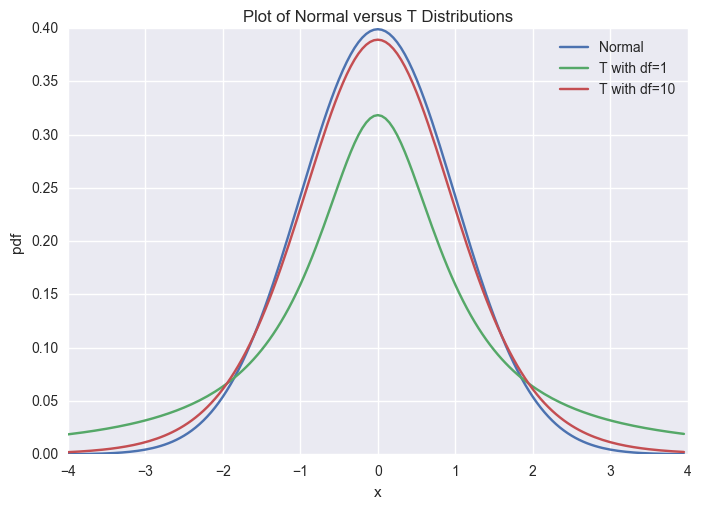

In [2]:
# Below we plot the normal and student t distributions

import numpy as np
import matplotlib.pylab as plt
from scipy import stats

x = np.arange(-4,4,.05)
plt.plot(x, stats.norm.pdf(x), label="Normal")
plt.plot(x, stats.t.pdf(x, 1), label="T with df=1")
plt.plot(x, stats.t.pdf(x, 10), label="T with df=10")
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("Plot of Normal versus T Distributions")
plt.legend()
plt.show()

### Performing the Student T Test
If our data follow a student t distribution and we want to do hypothesis testing, we perform a t-test. We take the following steps:
1. Formulate your **null hypothesis**.
2. Choose a **significance level**.
3. Calculate the **test statistic**.
4. Calculate the **p-value**.
5. Accept or reject the null hypothesis.

#### Hypotheses:
The null hypothesis, $H_0$, is the hypothesis that no statistical difference exists between populations. The alternative hypothesis, $H_a$, is the hypothesis that a statistical difference exists. 

* upper tail: $H_0: \mu \leq \mu_0$ vs. $H_a : \mu > \mu_0$
* lower tail: $H_0: \mu \geq \mu_0$ vs. $H_a : \mu < \mu_0$
* two tail: $H_0: \mu = \mu_0$ vs. $H_a : \mu \neq \mu_0$

Question: When would you use a one tailed t test over a two tailed t test?

#### Significance level:
The significance level is the probability of rejecting the null hypothesis when it is true (or the probability of making a Type I error). The significance level is denoted by $\alpha$ and is usually set at or below 5%.

#### Test statistic:
The test statistic, $t_0$, is a value calculated from the sample data to evaluate whether or not we should accept or reject the null hypothesis. 

$$ t_0 = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}, df = n-1$$

$\bar{x}$ is the sample mean, $\mu$ is the population mean, $s$ is the sample standard deviation, $n$ is the number of observations, and $df$ is the degrees of freedom. 

#### P-value:
The p-value is the likelihood of obtaining the observed (or a more extreme) sample mean if the null hypothesis is true. The p-values are represented by the area under the pdf (as shown in the figure below for a two-tailed t-test). 

* upper tail: $P(t > t_0)$
* lower tail: $P(t < t_0)$
* two tail: $2P(t > |t_0|)$


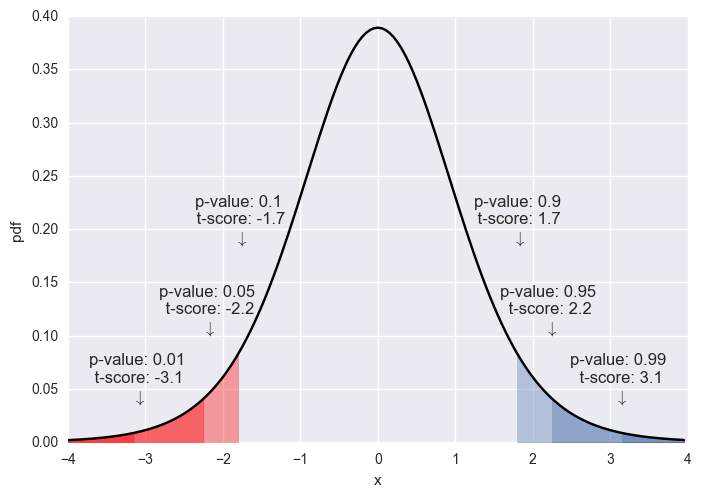

In [3]:
plt.plot(x, stats.t.pdf(x, 10),color='black')
pdf = stats.t.pdf(x, 10)

#Studnt, n=11, 2-tail
alpha_r = np.array([0.01, 0.05, 0.1])
alpha_l = 1 - alpha_r
tcritical = stats.t.ppf(1-alpha_r/2, 11)

for i,t in enumerate(tcritical):
    plt.fill_between(x[x>t], 0*x[x>t], pdf[x>t], alpha=0.35)
    plt.fill_between(x[x<-t], 0*x[x<-t], pdf[x<-t], alpha=0.35,color='red')
    plt.text(-t, 0.02+2*pdf[x<-t][-1], 'p-value: ' + str(alpha_r[i]) + \
             '\n t-score: ' + str(-t)[0:4] + '\n $\downarrow$' ,horizontalalignment='center')
    plt.text(t, 0.02+2*pdf[x<-t][-1], 'p-value: ' + str(alpha_l[i]) + \
             '\n t-score: ' + str(t)[0:3] + '\n $\downarrow$' ,horizontalalignment='center')
    
plt.xlabel("x")
plt.ylabel("pdf")
plt.show()

### Type I and Type II errors

Type I and Type II errors in hypothesis testing are shown in both the table and figure below. However, note that there is no single Type II error -- there is one for every population $\mu$ that meets the condition of the alternative hypothesis.

|                   |       Accept $H_0$       |      Reject $H_0$       |
|-------------------|:------------------------:|:-----------------------:|
| **$H_0$ True**    |     True Positive        | False Positive (Type I) |
| **$H_0$ False**   | False Negative (Type II) |     True Negative       |

Question: In the figure, which regions represent true positives and true negatives?

There is a tradeoff between making Type I and Type II errors. These errors are also related to precision and recall: 

$$ \text{Precision} = \frac{tp}{tp + fp} $$
$$ \text{Recall} = \frac{tp}{tp + fn} $$

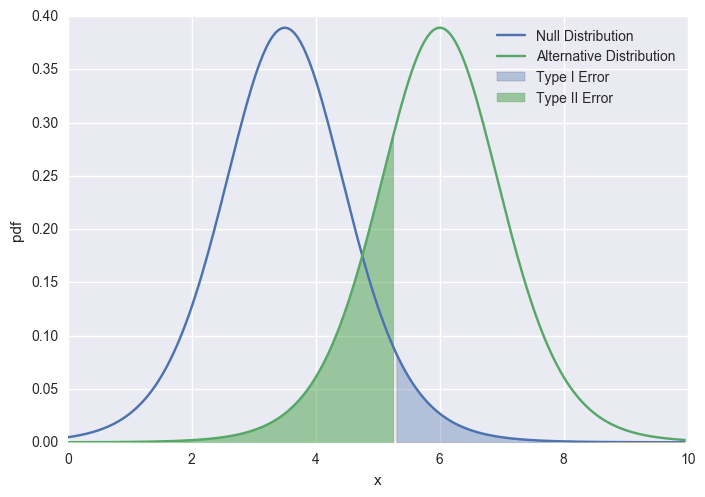

In [4]:
x = np.arange(0,10,.05)

means = np.array([3.5,6])

pdf_h0 = stats.t.pdf(x, 10, means[0], 1)
pdf_h1 = stats.t.pdf(x, 10, means[1], 1)

plt.plot(x, pdf_h0, label='Null Distribution')
plt.plot(x, pdf_h1, label='Alternative Distribution')

alpha = 0.05
t_critical = stats.t.ppf(1-alpha, 11) + means[0]
plt.fill_between(x[x>t_critical], 0*x[x>t_critical], pdf_h0[x>t_critical], alpha=0.35, label='Type I Error')
plt.fill_between(x[x<t_critical], 0*x[x<t_critical], pdf_h1[x<t_critical], alpha=0.35, color='green', label='Type II Error')

plt.xlabel("x")
plt.ylabel("pdf")
plt.legend()
plt.show()

## Bayesian Posterior Inference

Bayesian inference is an alternative to null hypothesis testing. Instead first assuming our hypothesis is true and then evaluating the likelihood of obtaining our measurements, we do the opposite. Given the data we found, we evaluate the likelihood that our hypothesis is true. We will now derive Baye's Theorem.

### Bayes' Theorem

Bayes' theorem describes the probability of an event given certain conditions and prior knowledge. 

Let us consider a hypothetical population of men and women with a certain disease. The data is summarized in the table below:

|                   |         Men              |        Women            |                         |
|-------------------|:------------------------:|:-----------------------:|:-----------------------:|
| **Positive**      |          50              |          25             |          **75**         |
| **Negative**      |          50              |          75             |          **125**        |
|                   |        **100**           |        **100**          |          **200**        |

1. **Conditional Probability**, P(A|B): 
$$\begin{eqnarray}
P(+|M) &=& \frac{\text{number of men with the disease}}{\text{number of men}} = \frac{50}{100} = 0.5 \\
\\
\text{NOTE: } P(+|M) &\neq& P(M|+)
\end{eqnarray}$$
2. **Joint Probability**, P(A $\cap$ B):
$$\begin{eqnarray}
P(\text{man with the disease}) &=& P(M \cap +) = P(M) * P(+|M) = \frac{100}{200} * \frac{50}{100} = 0.25 \\
\\
\text{NOTE: } P(M \cap +) &=& P(+ \cap M) 
\end{eqnarray}$$
3. **Marginal Probability**, P(B):
$$ P(+) = P(M \cap +) + P(W \cap +) = \frac{50}{200} + \frac{25}{200} = \frac{3}{8}$$

What if we want to know $P(A|B)$ and we know $P(B|A)$? If we solve the following system of equations:

$$\begin{eqnarray}
P(A \cap B) &=& P(B) * P(A|B) \\
\\
P(B \cap A) &=& P(A) * P(B|A) \\
\\
P(A \cap B) &=& P(B \cap A)
\end{eqnarray}$$

Which gives us **Bayes' Theorem**:

$$ P(A|B) = \frac{P(B|A) * P(A)}{P(B)} $$

### The Posterior Distribution

Let us consider a set of measurements $m$. Using Bayes' Theorem, we can calculate the probability of obtaining a signal $s$ from our set of measurements. The distribution of probabilities for all values of $s$, conditioned on $m$, is called the **posterior distribution**.

$$\begin{eqnarray}
P(s|m) &=& \frac{P(m|s) * P(s)}{P(m)} \\
\\
\text{posterior distribution} &=& \frac{\text{likelihood * prior}}{\text{marginal likelihood}}
\end{eqnarray}$$

Let us consider the numerator:

$P(m|s = s_0)$ is the probability of getting measurements $m$ assuming the null hypothesis $s = s_0$. We can apply what we learned about hypothesis testing in the section above when evaluating this term. 

$P(s)$ what we assume to be true about the signal before we collect measurements.

Now let us consider the denominator:

$$ P(m) = \int_{s'}P(m|s')ds' $$

For many cases, the denominator is difficult to compute, and we cannot calculate the posterior distribution in a analytically. There are two ways to get around this hurdle. The first is choosing a prior in a smart way (choosing a **conjugate prior**) and sampling from our known distributions (**bayesian posterior sampling**). 

### Example: How hot is it outside?

Pretend you are a meteorologist, and you would like to report on the temperature in your city. There are 5 weather stations in the region, each reading 65, 68, 59, 63, 71 degrees. What temperature do you report?

#### Approach 1: Conjugate priors

Let us assume that the data is normally distributed, or that the likelihood is normally distributed. Without any more information, the best we can do is the blue curve in the figure below. However, according to historical data, the temperature for this time of year has been 63 $\pm$ 5 degrees. We are going to use this information (our prior) to constrain our results. Since the likelihood and prior distributions are both gaussian, we can compute the posterior distribution analytically. For this reason, we call the prior a conjugate prior. Some examples of conjugate pairs are as follows:

1. Likelihood is normal and prior is normal --> posterior is normal.
2. Likelihood is binomial and prior is beta --> posterior is beta.

If our likelihood has a mean $\mu$ and variance $\sigma^2$ and our conjugate prior has a mean $\mu_0$ and variance $\sigma_0^2$, then our posterior distribution is normal with a mean and variance of:

$$ \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^{n}{x_i}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}, \left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}\right)^{-1}$$

 66.6 6.40624695122
65.7366931561 2.8463315451


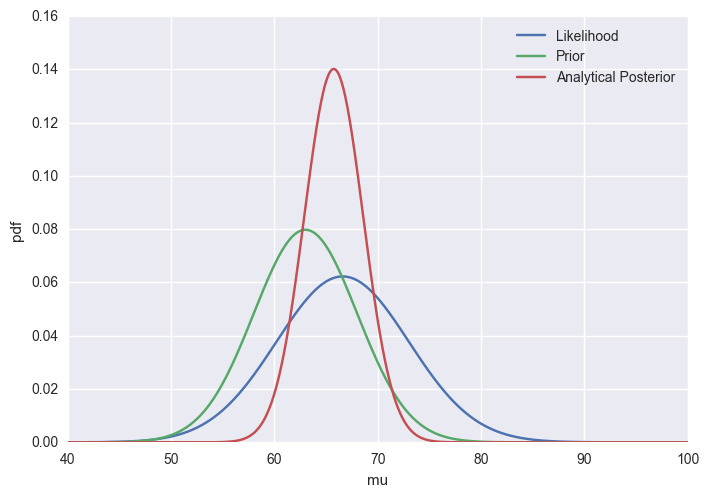

In [38]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = data.std()
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    print mu_post, np.sqrt(sigma_post)
    return stats.norm(mu_post, np.sqrt(sigma_post)).pdf(x)


temps = np.array([65, 68, 59, 63, 78])
print temps.mean(), temps.std()
x_axis = np.arange(40, 100, 0.05)

posterior_analytical = calc_posterior_analytical(temps, x_axis, 63, 25)

plt.plot(x_axis,stats.norm.pdf(x_axis, temps.mean(), temps.std()),label='Likelihood')
plt.plot(x_axis,stats.norm.pdf(x_axis, 63, 5),label='Prior')
plt.plot(x_axis, posterior_analytical, label='Analytical Posterior')

plt.xlabel("mu")
plt.ylabel("pdf")
plt.legend()
plt.show()

#### Approach 2: The Posterior and Sampling

Let's ignore the denominator for now. 

$$P(s|m) = P(m|s) * P(s)$$

For our example, this means that

$$P(s | m = [65, 68, 59, 63, 71]) = P(m = [65, 68, 59, 63, 71] | s) * P(s) $$

If we want to compute the probability that the true temperature is 80 given these measurements, we can do the following:

$$P(s = 80|m = [65, 68, 59, 63, 71]) = P(m=65|s=80) * P(m=68|s=80) * P(m=59|s=80) * P(m=63|s=80) * P(m=71|s=80) * P(s=80)^5$$

The probabilities given by the first 5 terms on the right hand side of the equation are shown in the figure below. Some of the terms are pretty small, so their product will be small too. Furthermore, the last term is extremely small when we consider the green curve in the figure above. We conclude that the probability that the true temprature is 80 degrees given our measurements and prior knowedge of the climatology is small. We can do this for all values of $s$, to get the posterior distribution.


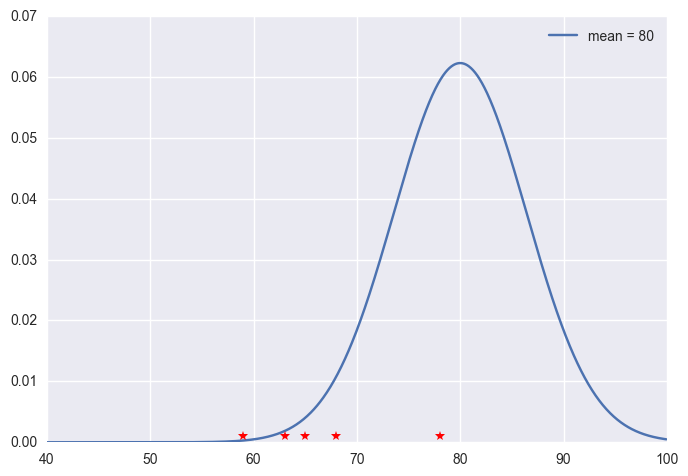

In [40]:
temps = np.array([65, 68, 59, 63, 78])
x_axis = np.arange(40, 100, 0.05)
y = np.zeros(5) + 0.001

pdf_norm = stats.norm.pdf(x_axis, 80, temps.std())
plt.plot(x_axis,pdf_norm, label='mean = 80')

plt.plot(temps,y,'r*')

plt.legend()
plt.show()

We are not actually going to do this for every $s$, because that would be computationally expensive. Instead, we are going to intelligently sample some $s$'s to construct the posterior distribution. We start with an initial guess that our mean is 65. Then we propose a new mean, and using a procedure similar to the one above, determine which of the two means describes the data better. However, whether we choose the better mean over the other is stochastic - the better the fit, the higher probability of accepting the new mean. We do this many times, and the distribution of the means we accept is the posterior distribution.

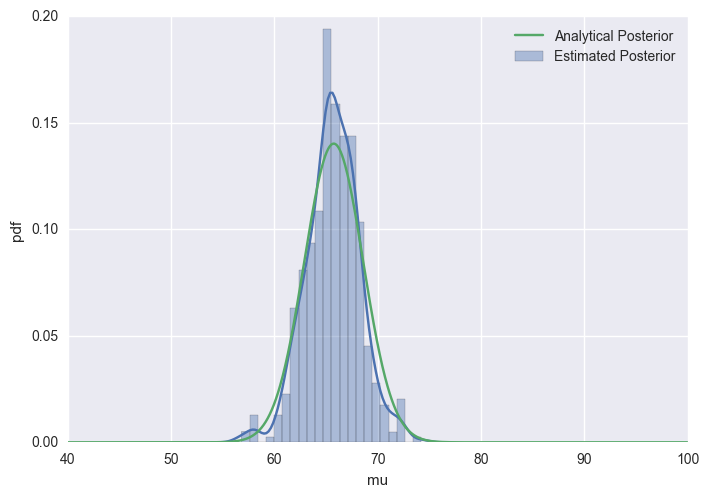

In [35]:
mu_current = 65
posterior = [mu_current]
for i in range(500):
    # suggest new position
    mu_proposal = stats.norm(mu_current, 3).rvs()
    
    # Compute likelihood by multiplying probabilities of each data point
    likelihood_current = stats.norm(mu_current, temps.std()).pdf(temps).prod()
    likelihood_proposal = stats.norm(mu_proposal, temps.std()).pdf(temps).prod()
    
    # Compute prior probability of current and proposed mu        
    prior_current = stats.norm(63, 5).pdf(mu_current)
    prior_proposal = stats.norm(63, 5).pdf(mu_proposal)
    
    p_current = likelihood_current * prior_current
    p_proposal = likelihood_proposal * prior_proposal
    
    # Accept proposal?
    p_accept = p_proposal / p_current
        
    # Usually would include prior probability, which we neglect here for simplicity
    accept = np.random.rand() < p_accept
        
    if accept:
        # Update position
        mu_current = mu_proposal
        
    posterior.append(mu_current)

sns.distplot(posterior, label='Estimated Posterior')
plt.plot(x_axis, posterior_analytical, label='Analytical Posterior')
plt.xlabel("mu")
plt.ylabel("pdf")
plt.legend()
plt.show()

## Overview
1. Pros and cons of hypothesis testing vs. bayesian inference
2. Pros and cons of conjugate pairs and bayesian posterior sampling 